<a href="https://colab.research.google.com/github/Folia412/Data_Analysis_2023/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [208]:
def shape(x, y):
  print(type(x), type(y))
  print(x.shape, y.shape)

In [209]:
df = pd.read_csv("riceClassification.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [210]:
data = df[['Area','Eccentricity','Extent', 'Perimeter', 'Roundness', 'Class']]

In [211]:
data.isnull().sum()

Area            0
Eccentricity    0
Extent          0
Perimeter       0
Roundness       0
Class           0
dtype: int64

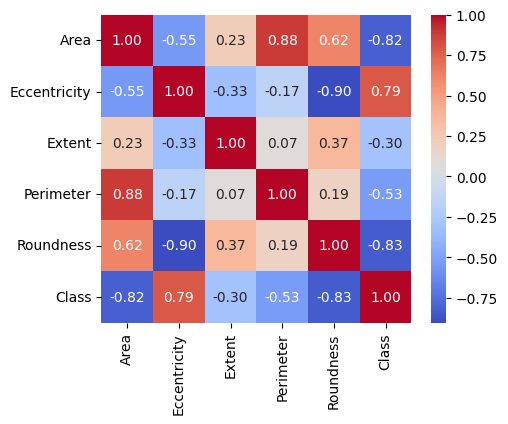

In [212]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

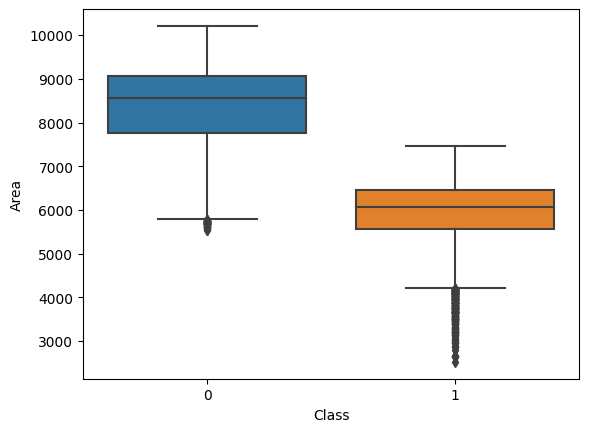

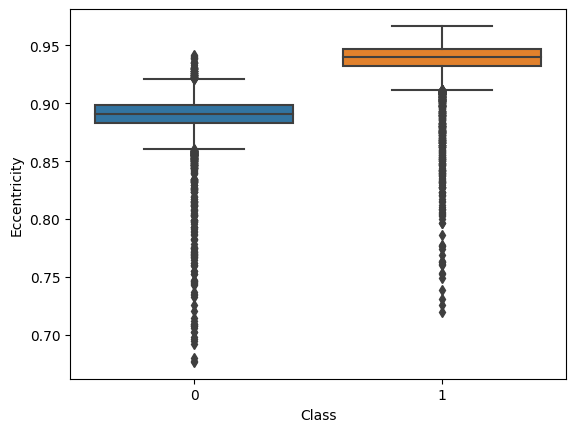

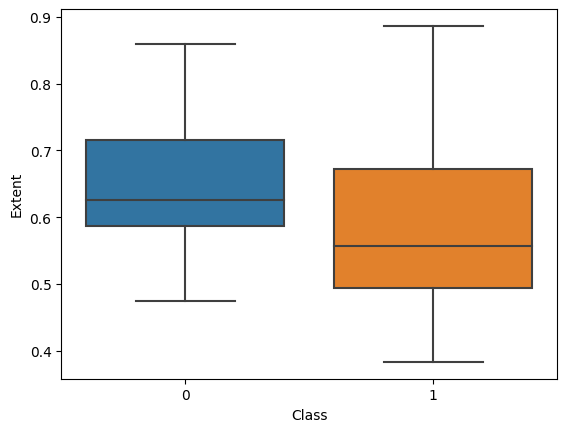

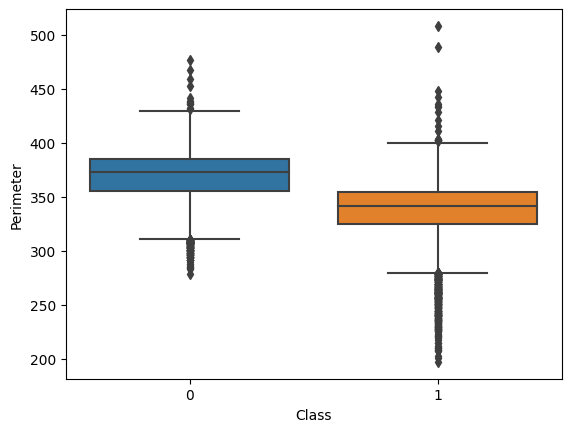

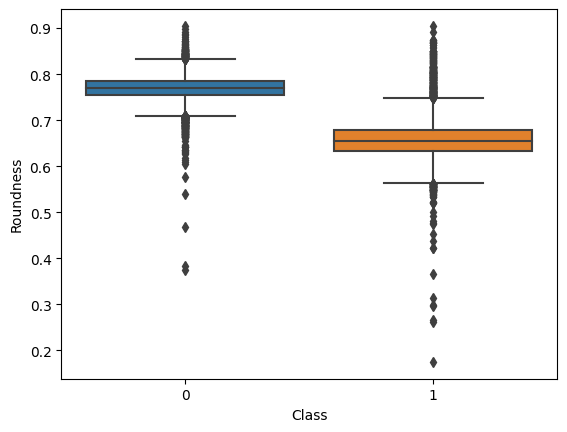

In [213]:
feature_names = list(data.columns)
for i in range((len(feature_names)-1)):
    figure = plt.figure()
    ax = sns.boxplot(x='Class', y=feature_names[i], data=data)

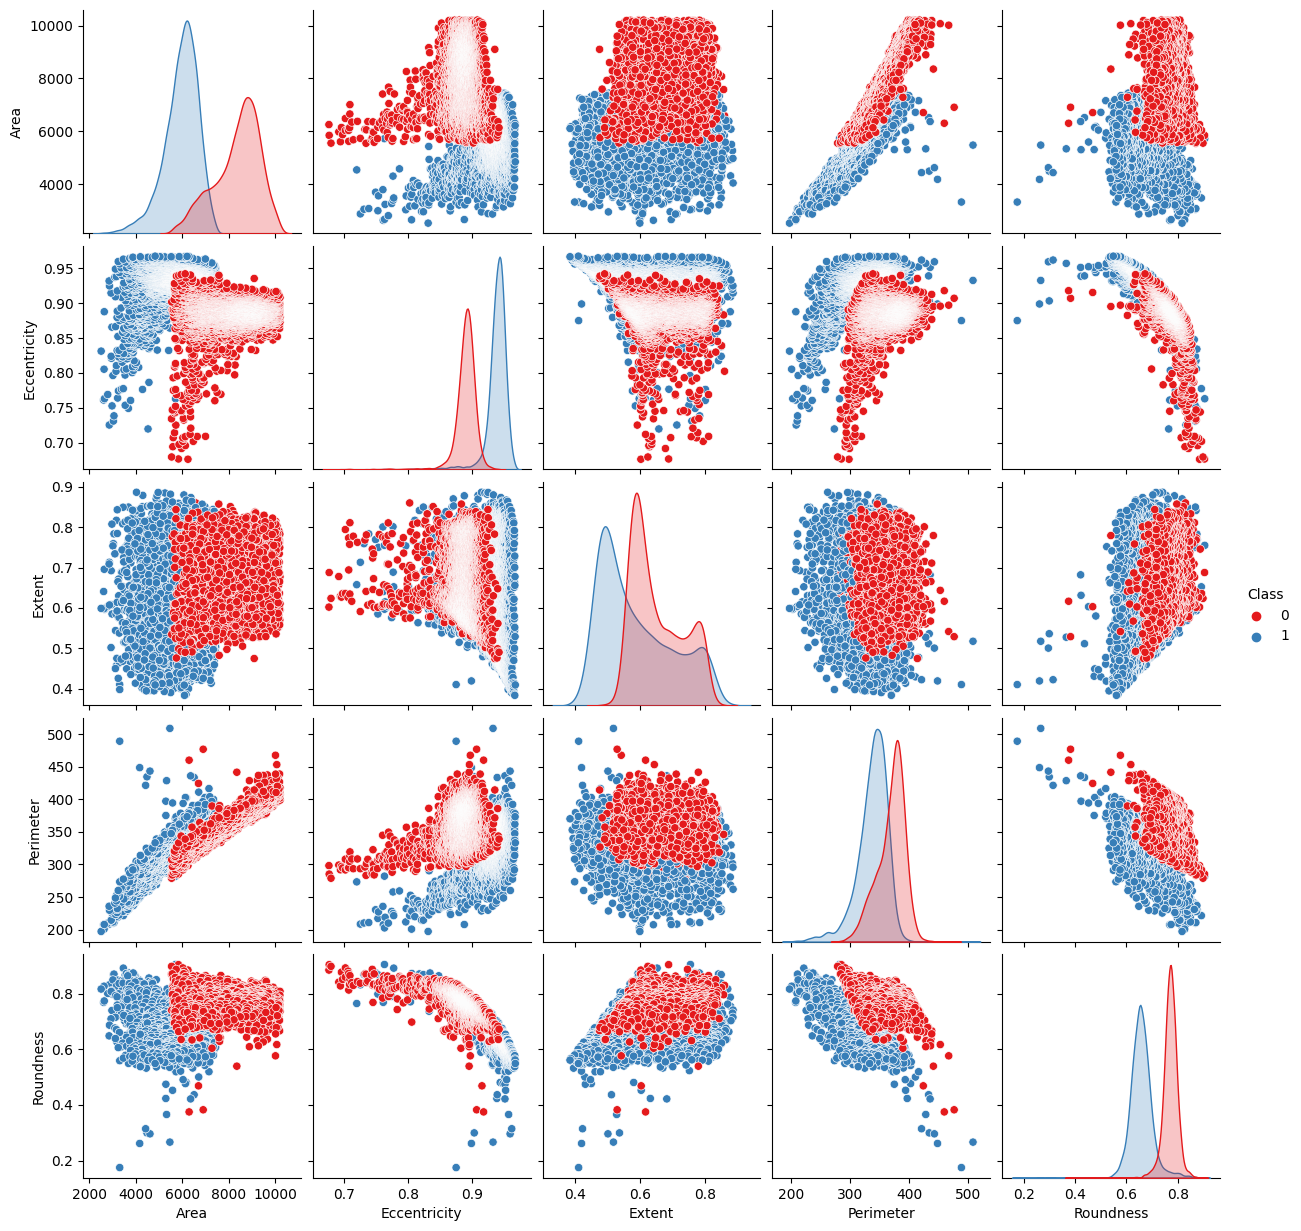

In [214]:
sns.pairplot(data, hue="Class", palette = 'Set1')

In [215]:
y = df[['Class']]
y = np.array(y)
x = df[['Area','Eccentricity', 'Extent', 'Perimeter', 'Roundness']]
shape(x, y)

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
(18185, 5) (18185, 1)


In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=20)
shape(x_train, y_train)

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
(9092, 5) (9092, 1)


In [217]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

DecisionTree

In [218]:
dtree = tree.DecisionTreeClassifier(max_depth=3, random_state=1)
dtree.fit(scaled_x_train, y_train.ravel())
prediction_1 = dtree.predict(scaled_x_test)

In [219]:
print(classification_report(y_test, prediction_1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4054
           1       0.99      0.99      0.99      5039

    accuracy                           0.99      9093
   macro avg       0.99      0.99      0.99      9093
weighted avg       0.99      0.99      0.99      9093



In [220]:
print(confusion_matrix(y_test, prediction_1))

[[3983   71]
 [  61 4978]]


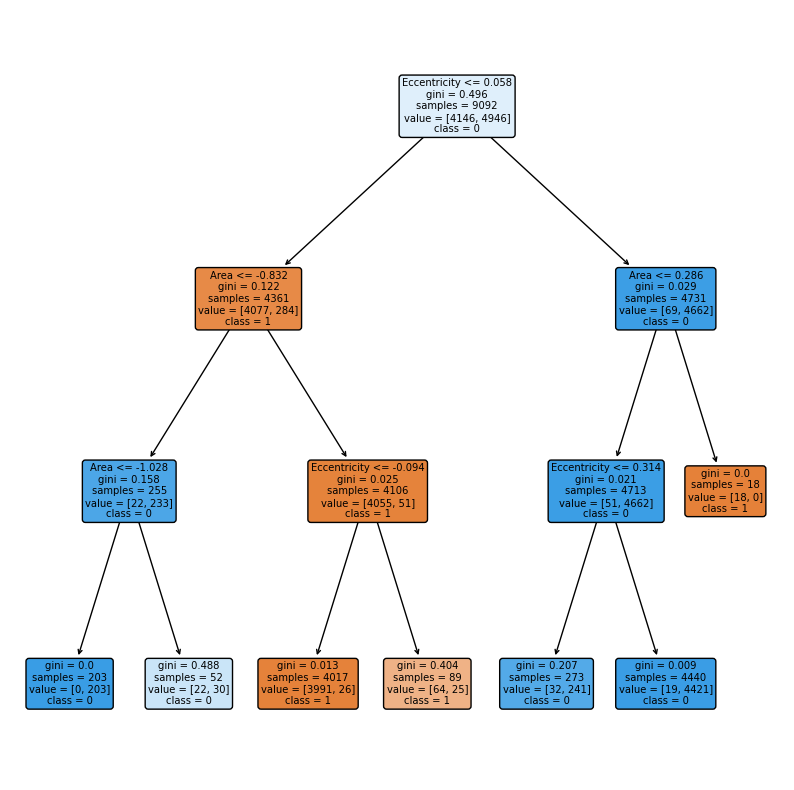

In [221]:
plt.figure(figsize = (10, 10))
tree.plot_tree(dtree, feature_names = ['Area','Eccentricity', 'Perimeter', 'Roundness'], class_names = ['1', '0'], filled = True, rounded=True)
plt.show()

RandomForest

In [222]:
rforest = RandomForestClassifier(n_estimators=60, max_depth = 3, random_state=1)
rforest.fit(scaled_x_train, y_train.ravel())
prediction_2 = rforest.predict(scaled_x_test)

In [223]:
print(confusion_matrix(y_test, prediction_2))

[[4009   45]
 [  49 4990]]


In [224]:
print(classification_report(y_test, prediction_2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4054
           1       0.99      0.99      0.99      5039

    accuracy                           0.99      9093
   macro avg       0.99      0.99      0.99      9093
weighted avg       0.99      0.99      0.99      9093



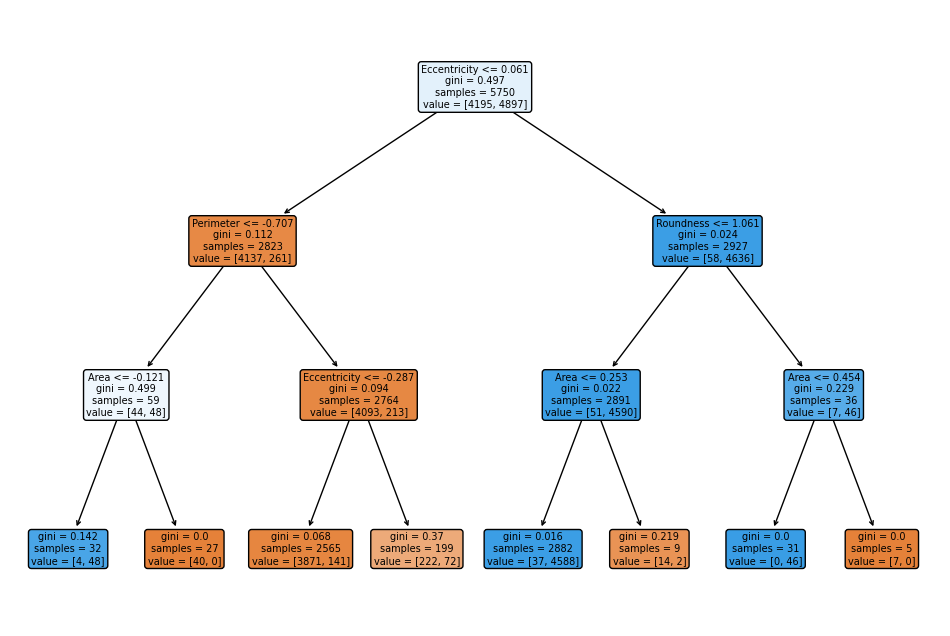

In [225]:
plt.figure(figsize=(12,8))
tree.plot_tree(rforest.estimators_[6], filled=True, rounded=True, feature_names=['Area','Eccentricity', 'Perimeter', 'Roundness'])
plt.show()

KNN

In [226]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_x_train, y_train.ravel())
prediction_3 = knn.predict(scaled_x_test)

In [227]:
print(confusion_matrix(y_test,prediction_3))

[[4003   51]
 [  35 5004]]


In [228]:
print(classification_report(y_test,prediction_3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4054
           1       0.99      0.99      0.99      5039

    accuracy                           0.99      9093
   macro avg       0.99      0.99      0.99      9093
weighted avg       0.99      0.99      0.99      9093



SVC

In [229]:
svc = SVC(C=1, gamma = 1, kernel = 'rbf')
svc.fit(scaled_x_train,y_train.ravel())
prediction_4 = svc.predict(scaled_x_test)

In [230]:
print(confusion_matrix(y_test,prediction_4))

[[3999   55]
 [  26 5013]]


In [231]:
print(classification_report(y_test,prediction_4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4054
           1       0.99      0.99      0.99      5039

    accuracy                           0.99      9093
   macro avg       0.99      0.99      0.99      9093
weighted avg       0.99      0.99      0.99      9093



AdaBoost

In [232]:
classifier = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 1), n_estimators = 200)
classifier.fit(scaled_x_train, y_train.ravel())
prediction_5 = classifier.predict(scaled_x_test)

In [233]:
print(confusion_matrix(y_test,prediction_5))

[[4002   52]
 [  49 4990]]


In [234]:
print(classification_report(y_test,prediction_5))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4054
           1       0.99      0.99      0.99      5039

    accuracy                           0.99      9093
   macro avg       0.99      0.99      0.99      9093
weighted avg       0.99      0.99      0.99      9093



Gridsearch

In [235]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_x_train, y_train.ravel())
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [237]:
grid_predictions = grid.best_estimator_.predict(scaled_x_test)

In [238]:
print("Gridsearch:", accuracy_score(y_test,grid_predictions))
print("SVC:", accuracy_score(y_test,prediction_4))

Gridsearch: 0.9899923017705927
SVC: 0.9910920488287693


Best Fit K-Value in KNN

In [239]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train,y_train.ravel())
    pred_i = knn.predict(scaled_x_test)
    error_rate.append(np.mean(pred_i != y_test))

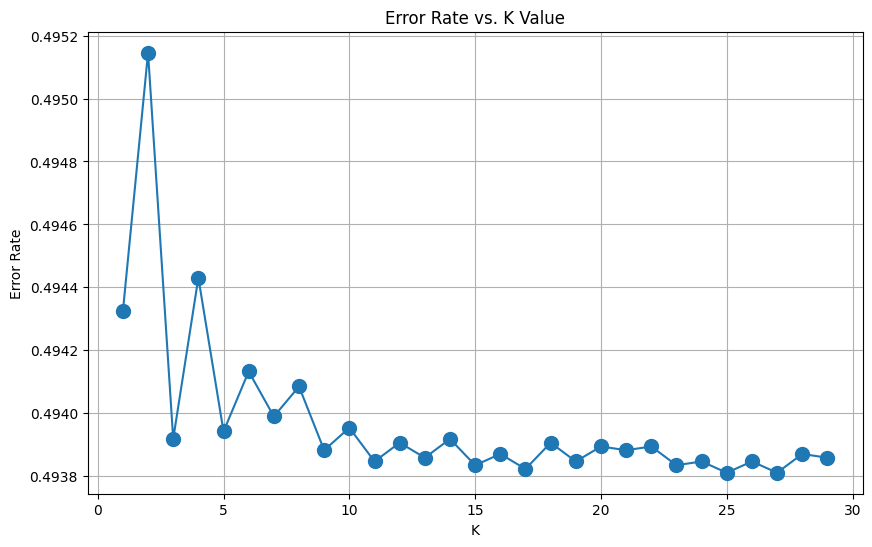

In [240]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [241]:
print("DecisionTree:", accuracy_score(y_test,prediction_1))
print("RandomForest:", accuracy_score(y_test,prediction_2))
print("kNN:", accuracy_score(y_test,prediction_3))
print("SVC:", accuracy_score(y_test,prediction_4))
print("AdaBoost:", accuracy_score(y_test,prediction_5))

DecisionTree: 0.9854833388320686
RandomForest: 0.9896623776531398
kNN: 0.990542175299681
SVC: 0.9910920488287693
AdaBoost: 0.9888925547124161
